# Airbnb Prediction Experiment

Open Data obtained from Kaggle  
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3

In [25]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math

# import plotly.express as px
# from pprint import pprint

# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Importing ML Stuffs
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

#from xgboost import XGBRegressor

#Model interpretation modules
# import eli5

import os

In [26]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Constants

In [29]:
BASEPATH = os.path.abspath('')
DATASET = 'AB_NYC_2019.csv'
PATH = os.path.join(BASEPATH,DATASET)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

K_FOLDS = 6

print(PATH)

/Users/jeydi/OneDrive/CorsoInsubria-DataScienceBusiness/Notebooks/6_machine_learning/ml_evaluation/Experiments/NewYorkAirbnb/AB_NYC_2019.csv


#### Import the data

In [30]:
#Import the data
df = pd.read_csv(PATH, low_memory=False, 
                     parse_dates=["last_review"])

#checking amount of rows in given dataset to understand the size we are working with

print(f'Dataframe Length: {len(df)}')
print(f'Number of Columns: {len(df.columns)}')
print(f'Dataframe shape: {len(df.shape)}')
#Data Types
df.dtypes

Dataframe Length: 48895
Number of Columns: 16
Dataframe shape: 2


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [31]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [32]:
display_all(df.head().T)

0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       Brooklyn   
neighbourhood                                           Kensington   
latitude                                                   40.6475   
longitude                                                 -73.9724   
room_type                                             Private room   
price                                                          149   
minimum_nights                                                   1   
number_of_reviews                                                9   
last_review                                    2018-10-19 00:00:00   
reviews_per_month                                             0.21   
calculated_host_listings_count                                   6   
availability_365                                               365   

                                                    1  \
id                                               2595   
name                            Skylit Midtown Castle   
host_id                                          2845   
host_name                                    Jennifer   
neighbourhood_group                         Manhattan   
neighbourhood                                 Midtown   
latitude                                      40.7536   
longitude                                    -73.9838   
room_type                             Entire home/apt   
price                                             225   
minimum_nights                                      1   
number_of_reviews                                  45   
last_review                       2019-05-21 00:00:00   
reviews_per_month                                0.38   
calculated_host_listings_count                      2   
availability_365                                  355   

                                                                  2  \
id                                                             3647   
name                            THE VILLAGE OF HARLEM....NEW YORK !   
host_id                                                        4632   
host_name                                                 Elisabeth   
neighbourhood_group                                       Manhattan   
neighbourhood                                                Harlem   
latitude                                                     40.809   
longitude                                                  -73.9419   
room_type                                              Private room   
price                                                           150   
minimum_nights                                                    3   
number_of_reviews                                                 0   
last_review                                                     NaT   
reviews_per_month                                               NaN   
calculated_host_listings_count                                    1   
availability_365                                                365   

                                                              3  \
id                                                         3831   
name                            Cozy Entire Floor of Brownstone   
host_id                                                    4869   
host_name                                           LisaRoxanne   
neighbourhood_group                                    Brooklyn   
neighbourhood                                      Clinton Hill   
latitude                                                40.6851   
longitude                                              -73.9598   
room_type                                       Entire home/apt   
price                     

In [33]:
display_all(df.describe(include='all').T)

count unique                  top   freq  \
id                              48895    NaN                  NaN    NaN   
name                            48879  47905       Hillside Hotel     18   
host_id                         48895    NaN                  NaN    NaN   
host_name                       48874  11452              Michael    417   
neighbourhood_group             48895      5            Manhattan  21661   
neighbourhood                   48895    221         Williamsburg   3920   
latitude                        48895    NaN                  NaN    NaN   
longitude                       48895    NaN                  NaN    NaN   
room_type                       48895      3      Entire home/apt  25409   
price                           48895    NaN                  NaN    NaN   
minimum_nights                  48895    NaN                  NaN    NaN   
number_of_reviews               48895    NaN                  NaN    NaN   
last_review                     38843   1764  2019-06-23 00:00:00   1413   
reviews_per_month               38843    NaN                  NaN    NaN   
calculated_host_listings_count  48895    NaN                  NaN    NaN   
availability_365                48895    NaN                  NaN    NaN   

                                              first                 last  \
id                                              NaN                  NaN   
name                                            NaN                  NaN   
host_id                                         NaN                  NaN   
host_name                                       NaN                  NaN   
neighbourhood_group                             NaN                  NaN   
neighbourhood                                   NaN                  NaN   
latitude                                        NaN                  NaN   
longitude                                       NaN                  NaN   
room_type                                       NaN                  NaN   
price                                           NaN                  NaN   
minimum_nights                                  NaN                  NaN   
number_of_reviews                               NaN                  NaN   
last_review                     2011-03-28 00:00:00  2019-07-08 00:00:00   
reviews_per_month                               NaN                  NaN   
calculated_host_listings_count                  NaN                  NaN   
availability_365                                NaN                  NaN   

                                       mean          std      min  \
id                              1.90171e+07  1.09831e+07     2539   
name                                    NaN          NaN      NaN   
host_id                           6.762e+07   7.8611e+07     2438   
host_name                               NaN          NaN      NaN   
neighbourhood_group                     NaN          NaN      NaN   
neighbourhood                           NaN          NaN      NaN   
latitude                            40.7289    0.0545301  40.4998   
longitude                          -73.9522    0.0461567 -74.2444   
room_type                               NaN          NaN      NaN   
price                               152.721      240.154        0   
minimum_nights                      7.02996      20.5105        1   
number_of_reviews                   23.2745      44.5506        0   
last_review                             NaN          NaN      NaN   
reviews_per_month                   1.37322      1.68044     0.01   
calculated_host_listings_count      7.14398      32.9525        1   
availability_365                    112.781      131.622        0   

                                        25%          50%          75%  \
id                              9.47194e+06  1.96773e+07  2.91522e+07   
name                                    NaN          NaN          NaN   
host_id                         7.82203e+06  3.07938e

Check null Data

In [34]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Function to delete missing numbers data

In [37]:
def delete_data(dataframe, columns):
    result = pd.DataFrame()
    #dropping columns that are not significant or could be unethical to use
    result = dataframe.drop(columns, axis=1, inplace=True)
    #examing the changes
    print(dataframe.head(5))
    
    return result

In [38]:
# columns = ['id','host_name','last_review']
# airbnb = delete_data(df, columns)

In [39]:
#Replace null numbers in dataframe columns
def replace_null_numbers(dataframe, columns):
    result = pd.DataFrame()
    if isinstance(columns, list):
        for i,col in enumerate(columns):
            print(f'Column: {i}, name: {col}')
            dataframe.fillna({col:0}, inplace=True)
            #replacing all NaN values in 'reviews_per_month' with 0

            #check column is null
            dataframe[col].isnull().sum()

            result = dataframe
        return result
    else:
        print("Please usa a list of columns to delete")
        return None


In [40]:
#replace null numbers
df = replace_null_numbers(df, ['reviews_per_month'])

Column: 0, name: reviews_per_month


#### Check Unique Data

In [41]:
def check_unique(dataframe,columns):
    
    if isinstance(columns,list):
        
        for i,col in enumerate(columns):
            
            print(f'\nColumn: {col}')
            print(dataframe[col].unique())
            
    else:
        print("Input columns must be a list")
        return None

In [42]:
check_unique(df,['neighbourhood_group','neighbourhood','room_type'])


Column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

Column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridg

### Top Host
Quali host (ID) hanno più case su Airbnb e ottengono vantaggi da essi

In [43]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

#### Neighborough wordcloud

In [44]:
text = " ".join(review for review in df['neighbourhood'])
print (f"There are {len(text)} words in the combination of all review.")

There are 630490 words in the combination of all review.


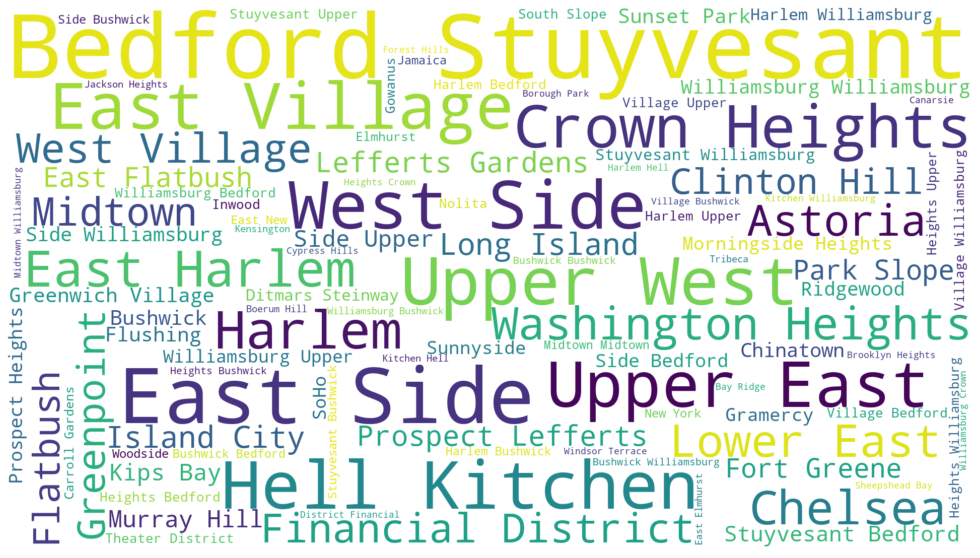

In [45]:
wordcloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=100, background_color="white").generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")

#save the image
plt.savefig(os.path.join(BASEPATH,'wordcloud.png'), format="png",bbox_inches='tight')

plt.show()



### Top Zone
Quali zone di Manhattan hanno tante case

In [46]:
top_zone=df.neighbourhood_group.value_counts().head(10)
top_zone

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

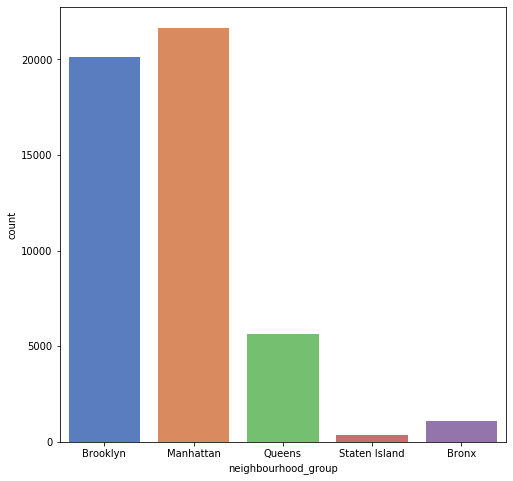

In [47]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df["neighbourhood_group"], palette="muted" ) 

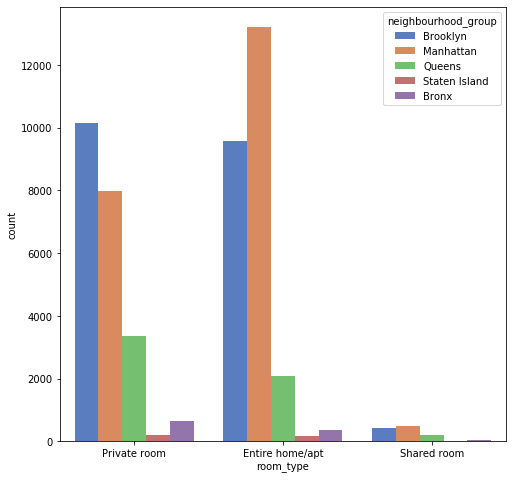

In [48]:
plt.figure(figsize=(8,8))
ax = sns.countplot(df['room_type'],hue=df['neighbourhood_group'], palette='muted')

### Number of reviews for Room Type

In [49]:
df.groupby('room_type')['number_of_reviews'].mean()

df.groupby(
    ['room_type','neighbourhood_group']
).agg(
    {
        'number_of_reviews': [sum, 'mean'],
        'price': "mean",
        'calculated_host_listings_count' : [sum,'count','mean']
    }
)

number_of_reviews                  price  \
                                                  sum       mean        mean   
room_type       neighbourhood_group                                            
Entire home/apt Bronx                           11627  30.678100  127.506596   
                Brooklyn                       267128  27.945183  178.327545   
                Manhattan                      235147  17.815516  249.239109   
                Queens                          60644  28.933206  147.050573   
                Staten Island                    5857  33.278409  173.846591   
Private room    Bronx                           16312  25.018405   66.788344   
                Brooklyn                       213653  21.086952   76.500099   
                Manhattan                      209150  26.202706  116.776622   
                Queens                          93561  27.746441   71.762456   
                Staten Island                    5670  30.159574   62.292553   
Shared room     Bronx                             432   7.200000   59.800000   
                Brooklyn                         5793  14.026634   50.527845   
                Manhattan                       10272  21.400000   88.977083   
                Queens                           2745  13.863636   69.020202   
                Staten Island                      14   1.555556   57.444444   

                                    calculated_host_listings_count         \
                                                               sum  count   
room_type       neighbourhood_group                                         
Entire home/apt Bronx                                          707    379   
                Brooklyn                                     17568   9559   
                Manhattan                                   249761  13199   
                Queens                                        3517   2096   
                Staten Island                                  281    176   
Private room    Bronx                                         1525    652   
                Brooklyn                                     25808  10132   
                Manhattan                                    25447   7982   
                Queens                                       18748   3372   
                Staten Island                                  534    188   
Shared room     Bronx                                          205     60   
                Brooklyn                                      2549    413   
                Manhattan                                     1865    480   
                Queens                                         740    198   
                Staten Island                                   50      9   

                                                
                                          mean  
room_type       neighbourhood_group             
Entire home/apt Bronx                 1.865435  
                Brooklyn              1.837849  
                Manhattan            18.922721  
                Queens                1.677958  
                Staten Island         1.596591  
Private room    Bronx                 2.338957  
                Brooklyn              2.547177  
                Manhattan             3.188048  
                Queens                5.559905  
                Staten Island         2.840426  
Shared room     Bronx                 3.416667  
                Brooklyn              6.171913  
                Manhattan             3.885417  
                Queens                3.737374  
                Staten Island         5.555556

### Price
Media del prezzo in generale

In [50]:
price_avrg=df.price.mean()
print('Average price per night: {}'.format(price_avrg))

##TODO: Price filtered per every type

Average price per night: 152.7206871868289


### Plotly interactive Map

In [51]:
#need to clear extreme price data
sub_df=pd.DataFrame()
sub_df=df[df.price < 600]

In [52]:
fig = px.scatter_mapbox(sub_df, lat="latitude", lon="longitude", color="price", size="number_of_reviews",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# Machine Learning

Iniziamo la parte di Machine Learning, quello che vogliamo predirre è il prezzo di una casa basandoci sulle sue caratteristiche.  
È certamente importante capire e analizzare più nel dettaglio le feature e capire la distribuzione del prezzo.

In [78]:
df_ml = df.copy()

Valutiamo ancora i missing data

In [80]:
def calc_missing(df_ml):
    total = df_ml.isnull().sum().sort_values(ascending=False)
    percent = (df_ml.isnull().sum())/df_ml.isnull().count().sort_values(ascending=False)

    missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False
                                ).sort_values('Total', ascending=False)

    return missing_data

In [81]:
result = calc_missing(df_ml)
result

Total   Percent
last_review                     10052  0.205583
host_name                          21  0.000429
name                               16  0.000327
availability_365                    0  0.000000
calculated_host_listings_count      0  0.000000
reviews_per_month                   0  0.000000
number_of_reviews                   0  0.000000
minimum_nights                      0  0.000000
price                               0  0.000000
room_type                           0  0.000000
longitude                           0  0.000000
latitude                            0  0.000000
neighbourhood                       0  0.000000
neighbourhood_group                 0  0.000000
host_id                             0  0.000000
id                                  0  0.000000

Filtriamo i dati che non ci servono e ripuliamo i missing

In [82]:
df_ml.drop(['host_name','name','host_id', 'id'], axis=1, inplace=True)

Trattiamo i dati missing

In [83]:
df_ml['reviews_per_month'] = df_ml['reviews_per_month'].fillna(0)

In [84]:
earliest = min(df_ml['last_review'])
df_ml['last_review'] = df_ml['last_review'].fillna(earliest)
df_ml['last_review'] = df_ml['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [85]:
result = calc_missing(df_ml)
result

Total  Percent
availability_365                    0      0.0
calculated_host_listings_count      0      0.0
reviews_per_month                   0      0.0
last_review                         0      0.0
number_of_reviews                   0      0.0
minimum_nights                      0      0.0
price                               0      0.0
room_type                           0      0.0
longitude                           0      0.0
latitude                            0      0.0
neighbourhood                       0      0.0
neighbourhood_group                 0      0.0

Guardiamo anche che non ci siano duplicati

In [86]:
#we don't wont duplicates, so check and remove them
print(df_ml.duplicated().sum())
df_ml.drop_duplicates(inplace=True)

0


Capiamo la distribuzione del prezzo in modo da capire come valutare il prezzo rispetto a quanto poi effettivamente lo usiamo.  
Questo perchè in problemi di Regressione come questo è possibile che la distribuzione abbia delle code anomale che possono sfasare di molto l'algoritmo, effettuando delle trasformazioni logaritmiche è possibile trattare meglio eventuali outliers avvicinandoci ad una normale.

Text(0.5, 0, 'log(1+price)')

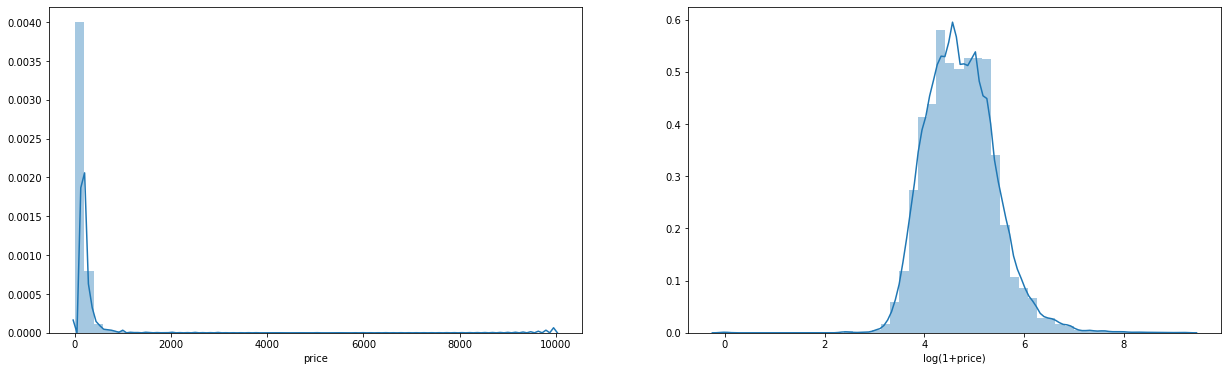

In [87]:
fig, axes = plt.subplots(1,2, figsize=(21,6))

sns.distplot(df_ml['price'], ax=axes[0])
sns.distplot(np.log1p(df_ml['price']), ax=axes[1])

axes[1].set_xlabel('log(1+price)')


Quindi effettuiamo la trasformazione sul prezzo

In [88]:
df_ml['price'] = np.log1p(df_ml['price'])

Questa analisi e questa trasformazione delle feature bisognerebbe farla per tutte le variabili che compaiono nel nostro dataset, alcune le abbiamo già analizzate durante la fase esplorativa

Analizziamo però anche il numero minimo di notti che compare come numero molto variabile, quindi per la stessa motivazione di prima è bene forse trasformarlo in scala logaritmica per avere dei dati continui più uniformi

Text(0, 0.5, 'count')

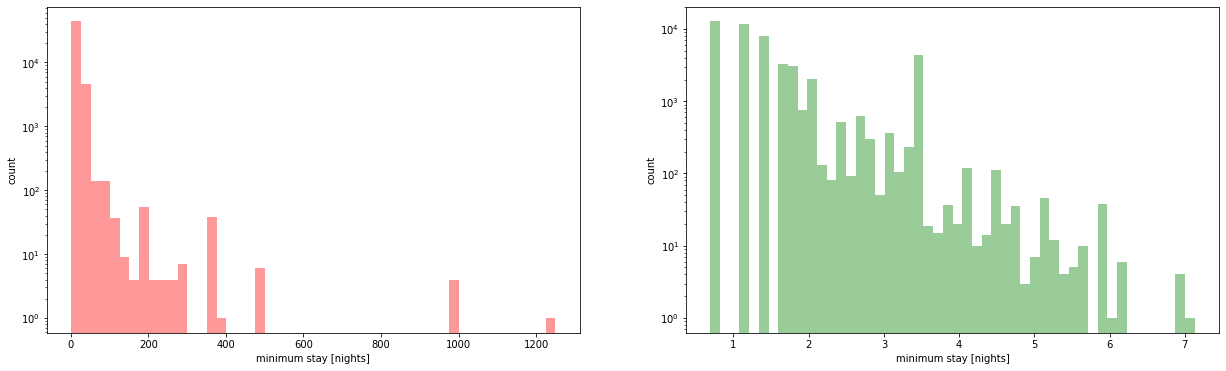

In [89]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(df_ml['minimum_nights'], rug=False, kde=False, color="red", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(df_ml['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [90]:
df_ml['minimum_nights'] = np.log1p(df_ml['minimum_nights'])

Bisogna considerare ancora due variabili molto importanti molto aggregate tra di loro a livello di informazione:
- reviews_per_month
- availability_365

Conviene trattarle entrambe, iniziando a capire se si possono quanto meno suddividere in trend più piccoli (non è obbligatorio, ma consigliato quando si hanno dati aggregati e si conosce il dominio di quel dato)

(0, 365)

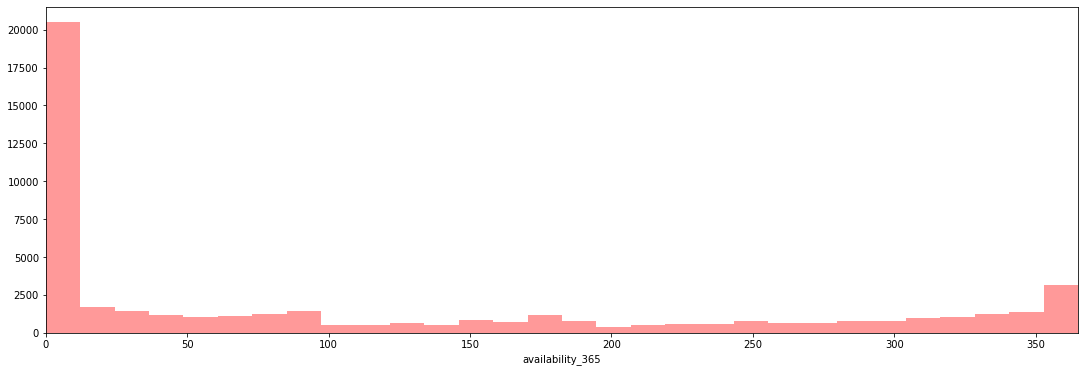

In [91]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(df_ml['availability_365'], rug=False, kde=False, color="red", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

possiamo quindi dedurre che ci sono 3 periodi di disponibilità diversi su un dato aggregato temporale come availability_365, quindi conviene trasformare le feature in 3 variabili distinte:
- se un appartamento è disponibile 365 giorni all'anno
- se un appartamento è disponibile solo in alcuni momenti durante i vari mesi 

In [92]:
df_ml['all_year_avail'] = df_ml['availability_365']>353
df_ml['low_avail'] = df_ml['availability_365']< 12

#also create no reviews variable and not consider when we have lots of reviews
df_ml['reviews_per_month'] = df_ml[df_ml['reviews_per_month'] < 17.5]['reviews_per_month']
df_ml['no_reviews'] = df_ml['reviews_per_month']==0

### Correlazione

È importante adesso effettuare un'analisi sulla correlazione tra le variabili per capire le dipendenze tra di esse ed eventualmente affinare la parte di feature selection

Text(0.5, 1, 'Correlation Matrix')

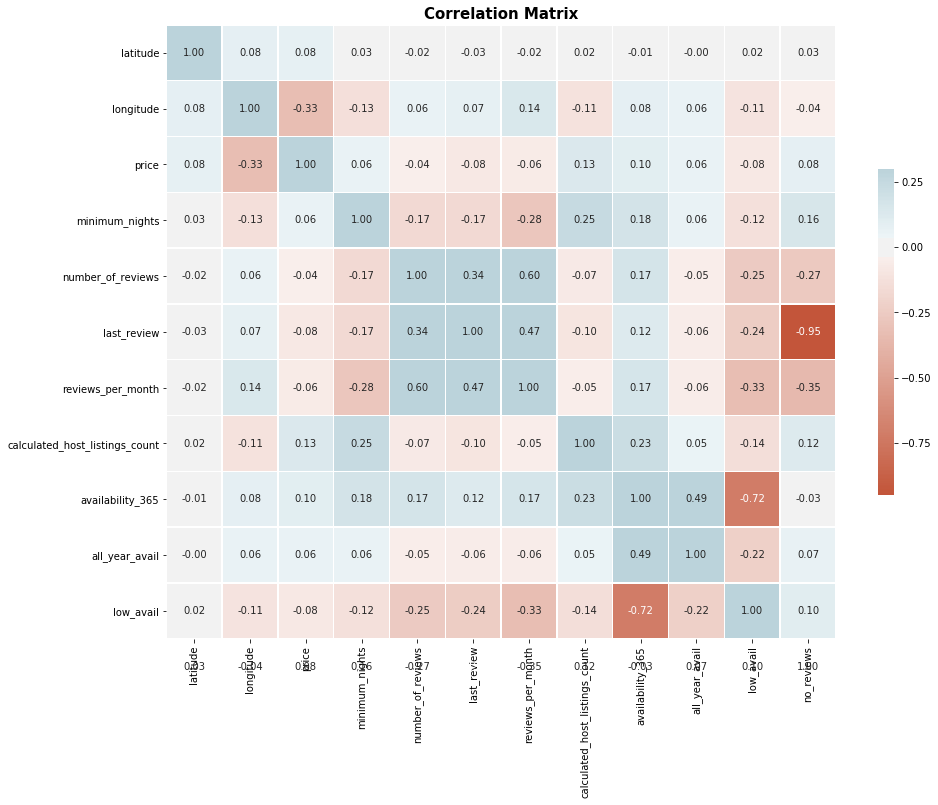

In [93]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df_ml.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Come si può vedere dalla mappa ci sono delle correlazione più forti sulle reviews.

Il numero delle reviews al mese è abbastanza correlato con il numero di reviews totali che a suo volta è ben correlato con la disponibilità della proprietà, ed entrambe queste correlazioni hanno senso in realtà.

Si possono ricavare molte informazioni interessanti legate alla variabile target che vogliamo predirre, come il fatto che la longitudine e la latitudine sono anticorrelate sempre rispetto al prezzo. Questo soprattutto dovuto al fatto che le case nel Bronx e nel Queens sono più economiche rispetto a Manhattan e Brooklyn ad esempio!

È importante sottolineare come questo processo di correlazione sia fondamentale da svolgere con esperti di dominio e dei dati che ci aiutino ad interpretarne i risultati!

Nonostante alcuni valori di correlazione molto alta, iniziamo a considerare tutte le variabili...in caso di overfitting andremo a rimuovere quelle più correlate lavorando e sistemando la parte di Feature Engineering appena svolta

### Generiamo il dataset per il modello

Come prima cosa è importante SEMPRE trattare le feature categoriche che possono sicuramente dare problemi in alcuni tipi di modello che non le trattano e non le considerano automaticamente.  
Per fare ciò è necessario considerarle come variabili dummy

In [94]:
calc_missing(df_ml)

Total   Percent
reviews_per_month                   5  0.000102
no_reviews                          0  0.000000
low_avail                           0  0.000000
all_year_avail                      0  0.000000
availability_365                    0  0.000000
calculated_host_listings_count      0  0.000000
last_review                         0  0.000000
number_of_reviews                   0  0.000000
minimum_nights                      0  0.000000
price                               0  0.000000
room_type                           0  0.000000
longitude                           0  0.000000
latitude                            0  0.000000
neighbourhood                       0  0.000000
neighbourhood_group                 0  0.000000

Ci sono ancora dei missing dovute alle trasformazioni (non ho tempo di approfondire, ma sicuramente qualche trasformazione ha fatto qualcosa di strano...)

In [95]:
#we don't wont duplicates, so check and remove them
print(df_ml.duplicated().sum())
df_ml.drop_duplicates(inplace=True)

0


In [96]:
#Fill NA and verify the missing
df_ml['reviews_per_month'] = df_ml['reviews_per_month'].fillna(0)

Ora verifichiamo se sono presenti ancora delle feature categoriche e cerchamo di sistemarle

In [102]:
#Identify categorical features
categorical = df_ml.select_dtypes(include=['object'])

In [106]:
#Transform Categorical Features
categorical_features = pd.get_dummies(categorical)

neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                          0                             1   
1                          0                             0   
2                          0                             0   
3                          0                             1   
4                          0                             0   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                              0                           0   
1                              1                           0   
2                              1                           0   
3                              0                           0   
4                              1                           0   

   neighbourhood_group_Staten Island  neighbourhood_Allerton  \
0                                  0                       0   
1                                  0                       0   
2                                  0                       0   
3                                  0                       0   
4                                  0                       0   

   neighbourhood_Arden Heights  neighbourhood_Arrochar  neighbourhood_Arverne  \
0                            0                       0                      0   
1                            0                       0                      0   
2                            0                       0                      0   
3                            0                       0                      0   
4                            0                       0                      0   

   neighbourhood_Astoria          ...            neighbourhood_Williamsburg  \
0                      0          ...                                     0   
1                      0          ...                                     0   
2                      0          ...                                     0   
3                      0          ...                                     0   
4                      0          ...                                     0   

   neighbourhood_Willowbrook  neighbourhood_Windsor Terrace  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   neighbourhood_Woodhaven  neighbourhood_Woodlawn  neighbourhood_Woodrow  \
0                        0                       0                      0   
1                        0                       0                      0   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       0                      0   

   neighbourhood_Woodside  room_type_Entire home/apt  room_type_Private room  \
0                       0                          0                       1   
1                       0                          1                       0   
2                       0                          0                       1   
3                       0                          1                       0   
4                       0                          1                       0   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 229 columns]

Ora dobbiamo tenere in considerazione solamente le colonne numeriche e la labels

In [108]:
#Take only the numerical (we add the categorical later)
df_temp = df_ml.copy()
df_temp = df_ml.select_dtypes(exclude=['object'])

#get the label
y = df_temp.price

#Remove from numerical features the label y
df_temp = df_temp.drop(['price'], axis=1)

print(f'X shape: {df_temp.shape}')
print(f'y shape: {y.shape}')

X shape: (48895, 11)
y shape: (48895,)


In [111]:
#add the categorical to numeric one
X = np.concatenate((df_temp, categorical_features), axis=1)
X_df = pd.concat([df_temp, categorical_features], axis=1)
#X = numpy array, can be useful for some models
#X_df = is the pandas dataframe representation

In [113]:
#Final check the shape and the data
print(f'X shape:{X.shape}')
print(f'X shape:{X_df.shape}')
print(f'y shape:{y.shape}')

X shape:(48895, 240)
X shape:(48895, 240)
y shape:(48895,)


Facciamo un random split del nostro dataset con metodolo Holdout per iniziare

In [130]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)


In [131]:
print(f'X_train Shape: {x_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {x_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (39116, 240)
y_train Shape: (39116,)
X_test Shape: (9779, 240)
y_test Shape: (9779,)


Verifichiamo ancora una volta la presenza di dati nulli all'interno dei singoli dataset

A causa di alcune trasformazioni ci sono dei dati nulli all'interno di X_train, è necessario sistemarli (rimpiazziamo con 0, anche se sarebbe necessario fare qualche approfondimento in più)

Dato che il nostro problema è di Regressione, può essere interessante scalare il trainingset per avere media zero e varianza unitaria. Questo perchè consente ad alcuni algoritmi di convergere più velocemente (come ad esempio la regressione lineare)

In [132]:
#Robust Scaler transformations
scaler = RobustScaler()

x_train_orig = x_train.copy()
x_test_origin = x_test.copy()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Random Forest experiment

Adesso creiamo un singolo semplice esperimento di Random Forest per fare la predizione sulla nostra y: prezzi delle case.  

Cerchiamo di eseguire diverse iterazioni in modo da cercare *manualmente* una migliore configurazione di parametri

In [139]:
#Display Validation Function
def display_function(pipeline, x_train, x_test, y_train, y_test):
    
    #training
    pipeline.fit(x_train, y_train)
    #prediction over "new" data
    predictions = pipeline.predict(x_test)
    
    #EVALUATIONS METRICS
    R2 = r2_score(y_test,predictions)
    MAE = mean_absolute_error(y_test,predictions)
    MSE = mean_squared_error(y_test, predictions)
    
    print(f"R2: {R2}")
    print(f"MAE: {MAE}")
    print(f"MSE: {MSE}")
    print(f"Training Accuracy: {pipeline.score(x_train,y_train)}")
    print(f"Test Accuracy: {pipeline.score(x_test,y_test)}")
    
    return [predictions, R2, MAE, MSE]

In [142]:
#Simple Test
#TEST PIPELINE WITH HANDLY SPLIT

estimators = [10,50,100,200,500]
results = []
for i, n in enumerate(estimators):
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    pipeline = Pipeline(steps=[('model', model)])
    
    print(f'Estimator: {n}')
    
    result = display_function(pipeline, x_train, x_test, y_train, y_test)
    results.append(result)


Estimator: 10
R2: 0.548735154031702
MAE: 0.331865991109599
MSE: 0.21348783820488193
Training Accuracy: 0.9211329270565711
Test Accuracy: 0.548735154031702
Estimator: 50
R2: 0.5841770306807628
MAE: 0.31716455679892963
MSE: 0.19672072307209001
Training Accuracy: 0.940366328126798
Test Accuracy: 0.5841770306807628
Estimator: 100
R2: 0.5901208139968732
MAE: 0.3152152123766287
MSE: 0.19390879242371017
Training Accuracy: 0.9430137199961443
Test Accuracy: 0.5901208139968732
Estimator: 200
R2: 0.593826509865804
MAE: 0.3138685203398876
MSE: 0.19215567336918854
Training Accuracy: 0.9445014061031033
Test Accuracy: 0.593826509865804
Estimator: 500
R2: 0.595521003531496
MAE: 0.31332882815532903
MSE: 0.19135402929526515
Training Accuracy: 0.9448981628516788
Test Accuracy: 0.595521003531496


Proviamo a valutare il nostro dataset usando anche la cross validation

In [9]:
from sklearn import metrics as m
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score


In [11]:
#Visualize all possibile metrics for cross validation


In [12]:
#Do the cross validation


In [13]:
# Print and visualize the resuls    

#### What if plot analysis

Dato che abbiamo effettuato delle predizioni e abbiamo un modello è importante fare anche quella che viene chiamata: What if Analysis.  

Per questa analisi prendiamo il nostro test set e verifichiamo i valori reali con i valori predetti in modo da farci un'idea visuale di come il nostro modello sta funzionando!

In [14]:
#Take the *tentative iteration


#Create the variable (using exponential)

# Reconstruct the data used for predictions


In [15]:
#Plot the actual vs prediction
def plot_actual_prediction(df,actual='Actual',prediction='Prediction'):
    """
    Plot What If Analysis: Actual vs Prediction
    """
    # Subplot for Plotting Figure
    fig, ax_tempF = plt.subplots()  

    # Similar to fig=plt.figure(figsize=(12,6))
    fig.set_figwidth(12)
    fig.set_figheight(6)

    # set x label which is common
    ax_tempF.set_xlabel('Data')

    # bottom= false disables ticks and labelbottom disables x-axis labels
    ax_tempF.tick_params(axis = 'x',
                        bottom=True,
                        labelbottom=True) 

    #PREDICTION
    # set left y-axis label
    ax_tempF.set_ylabel(prediction, 
                        color='red',
                        size='x-large')

    # set labelcolor and labelsize to the left Y-axis
    ax_tempF.tick_params(axis='y', 
                         labelcolor='red', 
                         labelsize='large')

    # plot AvgTemp on Y-axis to the left 
    ax_tempF.plot(df.index, 
                  df[prediction], 
                  color='red')

    # twinx sets the same x-axis for both plots 
    ax_precip = ax_tempF.twinx()

    #ACTUAL
    #set Right y-axis label
    ax_precip.set_ylabel(actual, 
                         color='green', 
                         size='x-large') 

    # set labelcolor and labelsize to the Right Y-axis
    ax_precip.tick_params(axis='y', 
                          labelcolor='green',
                          labelsize='large')

    # plot WindAVg on Y-axis to the Right 
    ax_precip.plot(df.index, 
                     df[actual], 
                     color='green')

    #ax_precip.legend(0)
    fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax_tempF.transAxes)

    plt.show()
    
    return True

In [16]:
#Filter store to check


#Plot results table


#Plot the results


## Try other models and cross validation

Implement a cross validation

In [ ]:
# squared_loss
def rmse_cv(model):
    kf = KFold(K_FOLDS, shuffle=True, random_state = 42).get_n_splits(df_temp)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [128]:
Models_to_use = [LinearRegression, Ridge, Lasso, ElasticNet, RandomForestRegressor, HuberRegressor]

In [70]:
for Model in Models_to_use:
    print(f'\n Model in use: {Model}')
#     if Model == XGBRegressor: 
#         cv_res = rmse_cv(XGBRegressor(objective='reg:squarederror'))
#     else: 
#         cv_res = rmse_cv(Model())
    cv_res = rmse_cv(Model())
        
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, -cv_res.mean(), cv_res.std()))


 Model in use: <class 'sklearn.linear_model.base.LinearRegression'>


/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



LinearRegression: 0.00654 +/- 0.000455

 Model in use: <class 'sklearn.linear_model.ridge.Ridge'>
Ridge: 0.00653 +/- 0.000460

 Model in use: <class 'sklearn.linear_model.coordinate_descent.Lasso'>
Lasso: 0.01481 +/- 0.000537

 Model in use: <class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
ElasticNet: 0.01479 +/- 0.000541

 Model in use: <class 'sklearn.ensemble.forest.RandomForestRegressor'>


/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to

RandomForestRegressor: 0.00659 +/- 0.000342

 Model in use: <class 'sklearn.linear_model.huber.HuberRegressor'>
HuberRegressor: 0.00760 +/- 0.000287


In [87]:
rfr_CV_baseline = -rmse_cv(RandomForestRegressor(random_state=42))

In [88]:
rfr_CV_baseline

array([0.00599718, 0.00703319, 0.00667925, 0.00620746, 0.00695771,
       0.00641482])

In [69]:
rfr_baseline = RandomForestRegressor(random_state=42)

rfr_baseline.fit(X_train, y_train) 

y_train_rfr = rfr_baseline.predict(X_train)
y_test_rfr = rfr_baseline.predict(X_test)

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/jeydi/opt/anaconda3/envs/develop/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to

In [71]:
rfr_baseline_results = pd.DataFrame({'algorithm':['Random Forest Regressor [baseline]'],
            'CV error': rfr_CV_baseline.mean(), 
            'CV std': rfr_CV_baseline.std(),
            'training error': [mean_squared_error(y_train_rfr, y_train)],
            'test error': [mean_squared_error(y_test_rfr, y_test)]})
rfr_baseline_results

algorithm  CV error    CV std  training error  \
0  Random Forest Regressor [baseline]  0.006548  0.000378        0.001171   

   test error  
0    0.006333

### Eli5 Visualization
Optimize and visualize info with eli5  
https://eli5.readthedocs.io/en/latest/

Eli5 is a useful library that allow to visualize and debug machine learning models in python

In [72]:
eli5.show_weights(rfr_baseline, feature_names=list(X_df.columns))

Get the network configuration

In [73]:
rf = RandomForestRegressor(random_state=42)

print('Parameters currently in use: \n')
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Get the number of trees in the random forest for grid randomize search for better parameters

In [74]:
#Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop=2000,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


### Find better parameters

In [75]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=10, cv = 3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
#best_random = rf_random.best_estimator_
best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
rfr_CV_best = -rmse_cv(best_random)
best_random.fit(X_train, y_train) 
y_train_rfr = best_random.predict(X_train)
y_test_rfr = best_random.predict(X_test)
rfr_best_results = pd.DataFrame({'algorithm':['Random Forest Regressor'],
            'CV error': rfr_CV_best.mean(), 
            'CV std': rfr_CV_best.std(),
            'training error': [mean_squared_error(y_train, y_train_rfr)],
            'test error': [mean_squared_error(y_test, y_test_rfr)],
            'training_r2_score': [r2_score(y_train, y_train_rfr)],
            'test_r2_score': [r2_score(y_test, y_test_rfr)]})
rfr_best_results

In [ ]:
eli5.show_weights(best_random, feature_names=list(X_df.columns))